<a href="https://colab.research.google.com/github/abhishek18-blog/DataScience-and-ML/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

file_path = '/content/sample_data/StudentPerformance.csv'
df_salary = pd.read_csv(file_path)
display(df_salary.tail())

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


--- Simple Linear Regression ---
Simple LR - MSE: 58.95
Simple LR - RMSE: 7.68
Simple LR - R2 Score: 0.8409
Simple LR - Adjusted R2: 0.8409


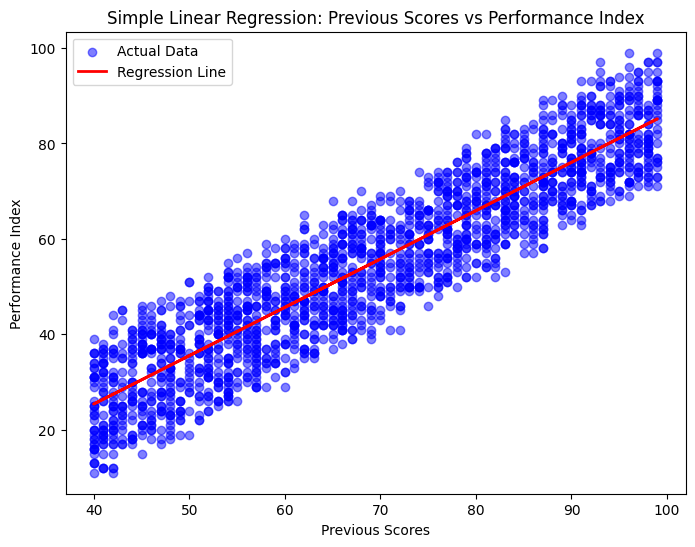

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# 1. Load Data
df = pd.read_csv(file_path)

# 2. Preprocessing
# Encode 'Extracurricular Activities' to binary (Yes=1, No=0)
df['Extracurricular Activities'] = df['Extracurricular Activities'].apply(lambda x: 1 if x == 'Yes' else 0)

# ==========================================
# SIMPLE LINEAR REGRESSION
# ==========================================
print("--- Simple Linear Regression ---")
# Using 'Previous Scores' as it has the highest correlation with Performance Index
X_simple = df[['Previous Scores']]
y_simple = df['Performance Index']

# Split Data
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

# Train Model
lr_simple = LinearRegression()
lr_simple.fit(X_train_s, y_train_s)

# Predict
y_pred_s = lr_simple.predict(X_test_s)

# Metrics
mse_s = mean_squared_error(y_test_s, y_pred_s)
rmse_s = np.sqrt(mse_s)
r2_s = r2_score(y_test_s, y_pred_s)
n_s = len(y_test_s)
k_s = 1
adj_r2_s = 1 - ((1-r2_s)*(n_s-1)/(n_s-k_s-1))

print(f"Simple LR - MSE: {mse_s:.2f}")
print(f"Simple LR - RMSE: {rmse_s:.2f}")
print(f"Simple LR - R2 Score: {r2_s:.4f}")
print(f"Simple LR - Adjusted R2: {adj_r2_s:.4f}")

# Plotting Simple LR
plt.figure(figsize=(8, 6))
plt.scatter(X_test_s, y_test_s, color='blue', label='Actual Data', alpha=0.5)
plt.plot(X_test_s, y_pred_s, color='red', linewidth=2, label='Regression Line')
plt.title('Simple Linear Regression: Previous Scores vs Performance Index')
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.legend()
plt.show()



--- Multiple Linear Regression ---
Multiple LR - MSE: 4.08
Multiple LR - RMSE: 2.02
Multiple LR - R2 Score: 0.9890
Multiple LR - Adjusted R2: 0.9890


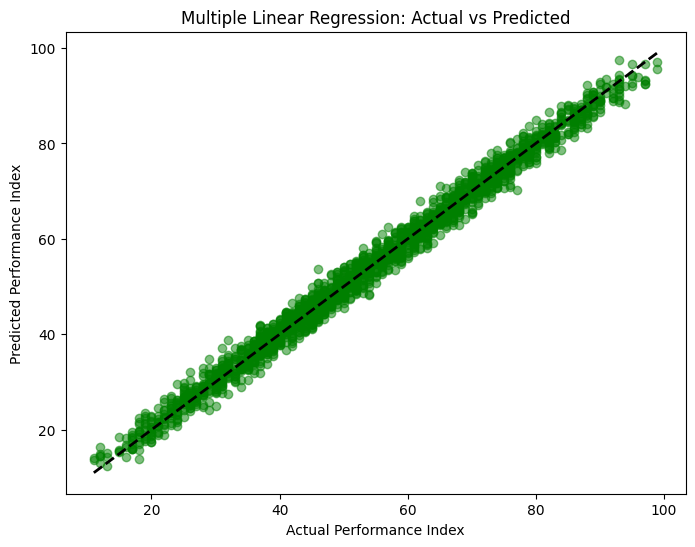

In [3]:

# ==========================================
# MULTIPLE LINEAR REGRESSION
# ==========================================
print("\n--- Multiple Linear Regression ---")
# Using all features
X_multi = df.drop('Performance Index', axis=1)
y_multi = df['Performance Index']

# Split Data
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Train Model
lr_multi = LinearRegression()
lr_multi.fit(X_train_m, y_train_m)

# Predict
y_pred_m = lr_multi.predict(X_test_m)

# Metrics
mse_m = mean_squared_error(y_test_m, y_pred_m)
rmse_m = np.sqrt(mse_m)
r2_m = r2_score(y_test_m, y_pred_m)
n_m = len(y_test_m)
k_m = X_multi.shape[1]
adj_r2_m = 1 - ((1-r2_m)*(n_m-1)/(n_m-k_m-1))

print(f"Multiple LR - MSE: {mse_m:.2f}")
print(f"Multiple LR - RMSE: {rmse_m:.2f}")
print(f"Multiple LR - R2 Score: {r2_m:.4f}")
print(f"Multiple LR - Adjusted R2: {adj_r2_m:.4f}")

# Plotting Multiple LR (Actual vs Predicted)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_m, y_pred_m, color='green', alpha=0.5)
plt.plot([y_test_m.min(), y_test_m.max()], [y_test_m.min(), y_test_m.max()], 'k--', lw=2)
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.show()



--- Logistic Regression ---
Logistic Regression - Accuracy: 0.9775
Confusion Matrix:
[[967  30]
 [ 15 988]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       997
           1       0.97      0.99      0.98      1003

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



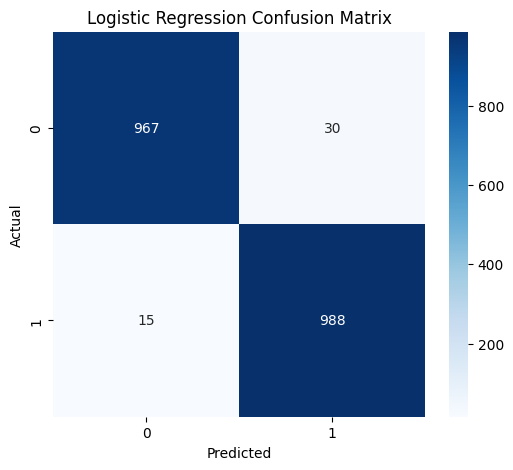

In [4]:

# ==========================================
# LOGISTIC REGRESSION
# ==========================================
print("\n--- Logistic Regression ---")
# Creating a binary target: 1 if Performance Index >= 55 (Pass), else 0 (Fail)
df['Pass'] = (df['Performance Index'] >= 55).astype(int)

X_log = df.drop(['Performance Index', 'Pass'], axis=1)
y_log = df['Pass']

# Split Data
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# Scaling (Important for Logistic Regression)
scaler = StandardScaler()
X_train_l_scaled = scaler.fit_transform(X_train_l)
X_test_l_scaled = scaler.transform(X_test_l)

# Train Model
log_reg = LogisticRegression()
log_reg.fit(X_train_l_scaled, y_train_l)

# Predict
y_pred_l = log_reg.predict(X_test_l_scaled)

# Metrics
acc_l = accuracy_score(y_test_l, y_pred_l)
conf_matrix_l = confusion_matrix(y_test_l, y_pred_l)

print(f"Logistic Regression - Accuracy: {acc_l:.4f}")
print("Confusion Matrix:")
print(conf_matrix_l)
print("\nClassification Report:")
print(classification_report(y_test_l, y_pred_l))






# Plotting Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_l, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()